<a href="https://colab.research.google.com/github/kjamal5518/Data-Analytics-portfolio/blob/main/Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [4]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier, Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE
import numpy as np
import seaborn as sns

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [5]:
#Step 2
from google.colab import files
segmentation = files.upload()





Saving Titanic.csv to Titanic (1).csv


In [6]:
titanic_data= pd.read_csv('Titanic.csv')

In [7]:
len(titanic_data)

891

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#countplot of subrvived vs not  survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

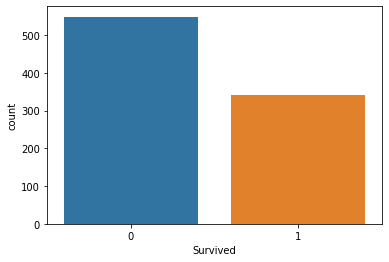

In [14]:
sns.countplot(x='Survived',data=titanic_data)

In [15]:
#Male vs Female Survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

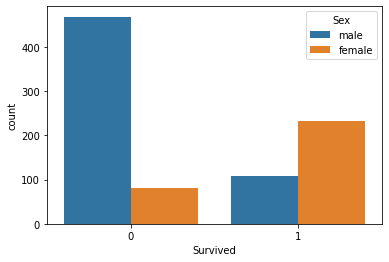

In [16]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [17]:
#Check for null

In [18]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Check how many values are null

In [20]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#Visualize null values

<AxesSubplot:>

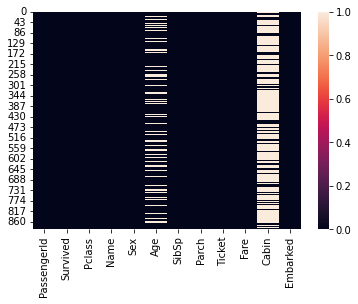

In [22]:
sns.heatmap(titanic_data.isna())

In [23]:
#find the % of null values in age column

In [24]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [25]:
#find the % of null values in cabin column

In [26]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

In [27]:
#find the distribution for the age column

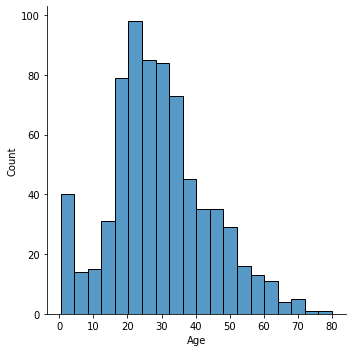

In [28]:
sns.displot(x='Age',data=titanic_data)

In [29]:
#fill age column

In [30]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [31]:
#verify null value

In [32]:
titanic_data['Age'].isna().sum()

0

In [33]:
#visualize null values

<AxesSubplot:>

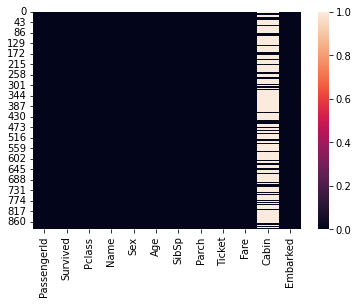

In [34]:
sns.heatmap(titanic_data.isna())

In [35]:
#Drop cabin column

In [36]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [37]:
#see the contents of the data

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#Step 3: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [39]:
#Check for the non-numeric column

In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [41]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [42]:
#convert sex column to numerical values

In [43]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [44]:
titanic_data['Gender']=gender

In [45]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [46]:
#drop the columns which are not required

In [47]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [48]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [49]:
#Seperate Dependent and Independent variables

In [50]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [52]:
#Step 3
#import train test split method


In [53]:
from sklearn.model_selection import train_test_split

#Step 4: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [54]:
#train test split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [56]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression

In [57]:
#Fit  Logistic Regression 
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [58]:
#predict
predict=lr.predict(x_test)

In [59]:
#Step 6
#print confusion matrix 

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

**Build a pipeline that will impute and standardize the data and fit an SVM with a linear kernel**
The first step shoulde be SimpleImputer(missing_values=np.nan, strategy='mean')). The second step should be StandardScaler(). And the third step should be SVC(kernel='linear'). Name the pipeline linear. Fit the pipeline to X_train and Y_train.

In [60]:
#Step 7
pipe_linear = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('linear', SVC(kernel='linear'))])
pipe_linear.fit(x_train, y_train)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('linear', SVC(kernel='linear'))])

E**valuate the pipeline using 10-fold cross-validation**
Calculate and print the accuracy of each of the five models using linear_scores = cross_val_score(linear, X_train, y_train, cv=10). Calculate and print the mean and SD of the accuracy measures returned from cross-validation.

In [61]:
scores = cross_val_score(pipe_linear, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.65       0.81666667 0.86666667 0.88333333 0.7        0.68333333
 0.79661017 0.79661017 0.74576271 0.86440678]
0.7803389830508475
0.07811857685300447


**Build a pipeline that will impute and standardize the data and fit an SVM with a polynomial kernel, then valuate the model using 10-fold CV**
Note that you can copy and adapt much of the code you used in the last few steps. The first step shoulde be SimpleImputer(missing_values=np.nan, strategy='mean')). The second step should be StandardScaler(). And the third step should be SVM(kernel='poly'). Name the pipeline poly. Fit the pipeline to X_train and Y_train. Calculate and print the accuracy of each of the five models using poly_scores = cross_val_score(pipe, X_train, y_train, cv=10). Calculate and print the mean and SD of the accuracy measures returned from cross-validation.

In [62]:
pipe_poly = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('poly', SVC(kernel='poly'))])
pipe_poly.fit(x_train, y_train)

scores = cross_val_score(pipe_poly, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.66666667 0.78333333 0.86666667 0.9        0.78333333 0.73333333
 0.76271186 0.77966102 0.77966102 0.86440678]
0.7919774011299434
0.06553212043061817


**Build a pipeline that will impute and standardize the data and fit an SVM with a radial basis function kernel, then evaluate the model using 10-fold CV**
Note that you can copy and adapt much of the code you used in the last few steps. The first step shoulde be SimpleImputer(missing_values=np.nan, strategy='mean')). The second step should be StandardScaler(). And the third step should be SVM(kernel='rbf'). Name the pipeline rbf. Fit the pipeline to X_train and Y_train. Calculate and print the accuracy of each of the five models using rbf_scores = cross_val_score(pipe, X_train, y_train, cv=10). Calculate and print the mean and SD of the accuracy measures returned from cross-validation.

In [63]:
pipe_rbf = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('rbf', SVC(kernel='rbf'))])
pipe_rbf.fit(x_train, y_train)

scores = cross_val_score(pipe_rbf, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.7        0.86666667 0.91666667 0.88333333 0.78333333 0.73333333
 0.84745763 0.76271186 0.76271186 0.89830508]
0.8154519774011298
0.0721328720742579


**Which kernel produced the highest accuracy?**
Print the mean accuracy for different values of C, the regularization parameter, for an SVM with a RBF kernel Run the following code block to calculate mean accuracy for several values of C. The code below will also print a graph of the mean accuracy for each C. What value(s) of C produce the highest accuracy?

       C  mean accuracy
0      1      81.545198
1     10      77.694915
2    100      74.833333
3   1000      72.985876
4  10000      72.155367


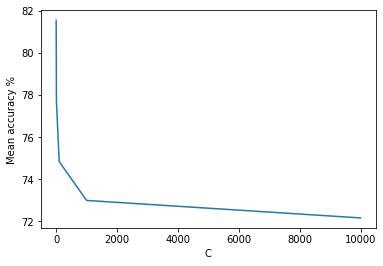

In [65]:
mean_accuracy = []

for i in [1,10,100,1000,10000]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                       ('rbf', SVC(kernel='rbf', C=i))])

  pipe.fit(x_train, y_train)
  scores = cross_val_score(pipe, x_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


C_df = pd.DataFrame([1,10,100,1000,10000])
C_df.rename({0:'C'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([C_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['C'], to_plot['mean accuracy'])
plt.xlabel('C')
plt.ylabel('Mean accuracy %')
plt.show()


# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

Does the SVM model with a RBF kernel and C=10 work better, worse, or about the same as logistic regression and KNN? **Recall that the accuracy for logistic regression is 79% and KNN were just under 81%.**

In [ ]:
# Step 8

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

It's difficult to say whether an SVM model with an RBF kernel and C=10 will work better, worse, or about the same as logistic regression and KNN without further information about the dataset and the specific problem at hand.

In general, SVMs with RBF kernels are powerful models that can handle non-linear data and achieve high accuracy on a wide range of problems. However, they can be sensitive to hyperparameter tuning, such as the choice of C and the kernel width (gamma).

Logistic regression is a simpler model that works well when the data is linearly separable and there are only a few features. It is often used as a baseline model to compare against more complex models.

KNN is a non-parametric model that makes predictions based on the k closest points in the training set. It can be effective when the data is not too high-dimensional and has a simple structure.

Ultimately, the choice of model will depend on the specific characteristics of the data and the problem at hand, as well as the performance metrics that are most important. It's always a good idea to try multiple models and compare their performance on a holdout validation set to determine which one works best for the problem at hand. In this project the accuracy of logistic regression is 79% and KNN were 81.5%.